In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_18/2395820855.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#training data
Y_train = data["label"]
X_train = data.drop(labels = ["label"],axis = 1) 

#validation data
data_valid = np.array(data)
m, n = data_valid.shape
np.random.shuffle(data_valid)

df_valid = data_valid[0:1000].T
Y_valid = df_valid[0]
X_valid = df_valid[1:n]

In [5]:
X_train.shape

(42000, 784)

In [6]:
Y_train.shape

(42000,)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

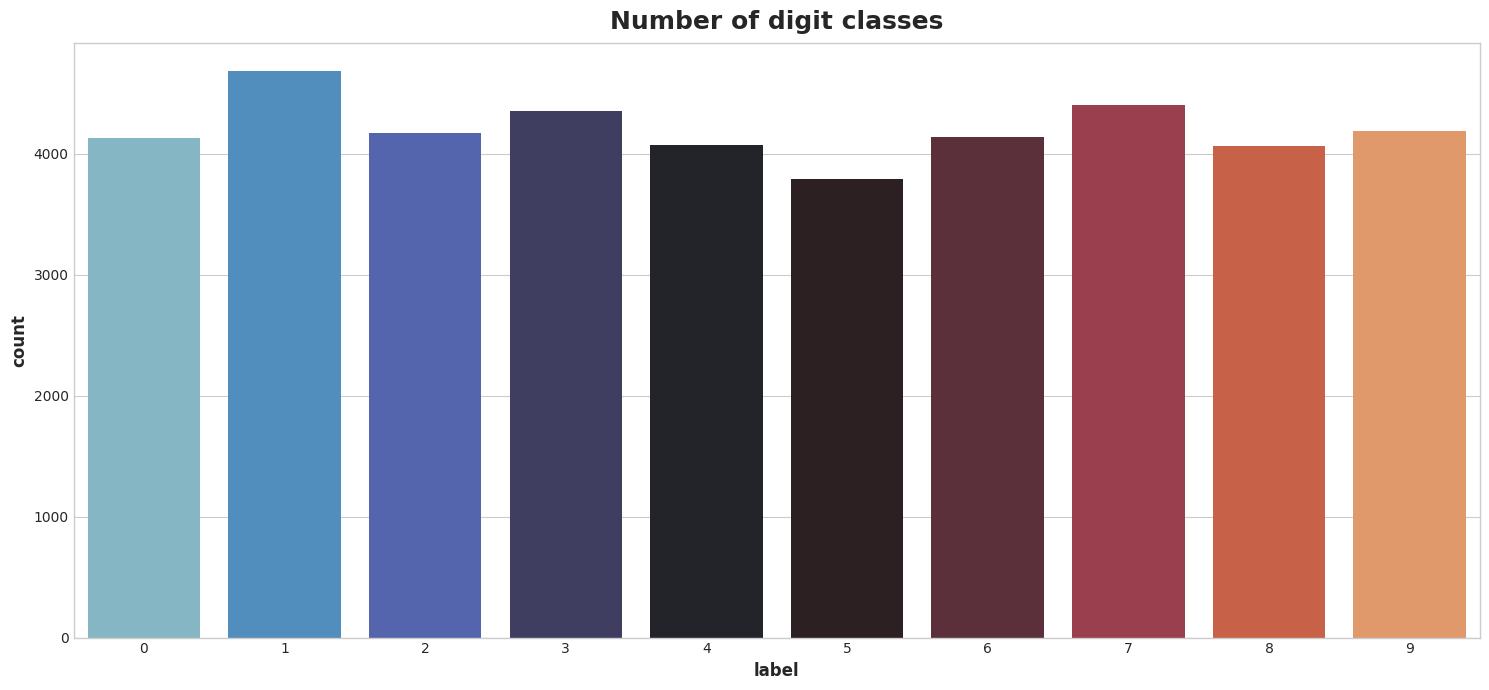

In [7]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

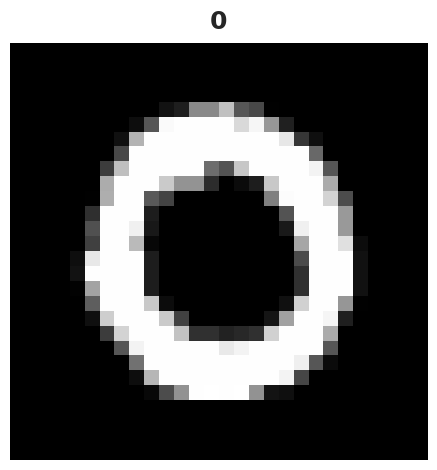

In [8]:
# plot some samples

i=1;
img = X_train.iloc[i].to_numpy()
img = img.reshape((28,28))
print(img)
plt.imshow(img,cmap='gray')
plt.title(data.iloc[i,0]) #label
plt.axis("off")
plt.show()

In [9]:
# Normalize the data
X_train = X_train / 255.0
test_data = test_data / 255.0
print("X_train shape: ",X_train.shape)
print("test_data shape: ",test_data.shape)

X_train shape:  (42000, 784)
test_data shape:  (28000, 784)


In [10]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("test_data: ",test_data.shape)

X_train shape:  (42000, 28, 28, 1)
test_data:  (28000, 28, 28, 1)


In [11]:
# Label Encoding 
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

print("X_train shape",X_train.shape)
print("X_valid shape",X_valid.shape)
print("Y_train shape",Y_train.shape)
print("Y_valid shape",Y_valid.shape)

X_train shape (37800, 28, 28, 1)
X_valid shape (4200, 28, 28, 1)
Y_train shape (37800, 10)
Y_valid shape (4200, 10)


In [13]:
def binaryToInt(arr):
    x=0
    label=-1
    for j in arr:
        if(j==1):
            label = x
        x +=1
    return label

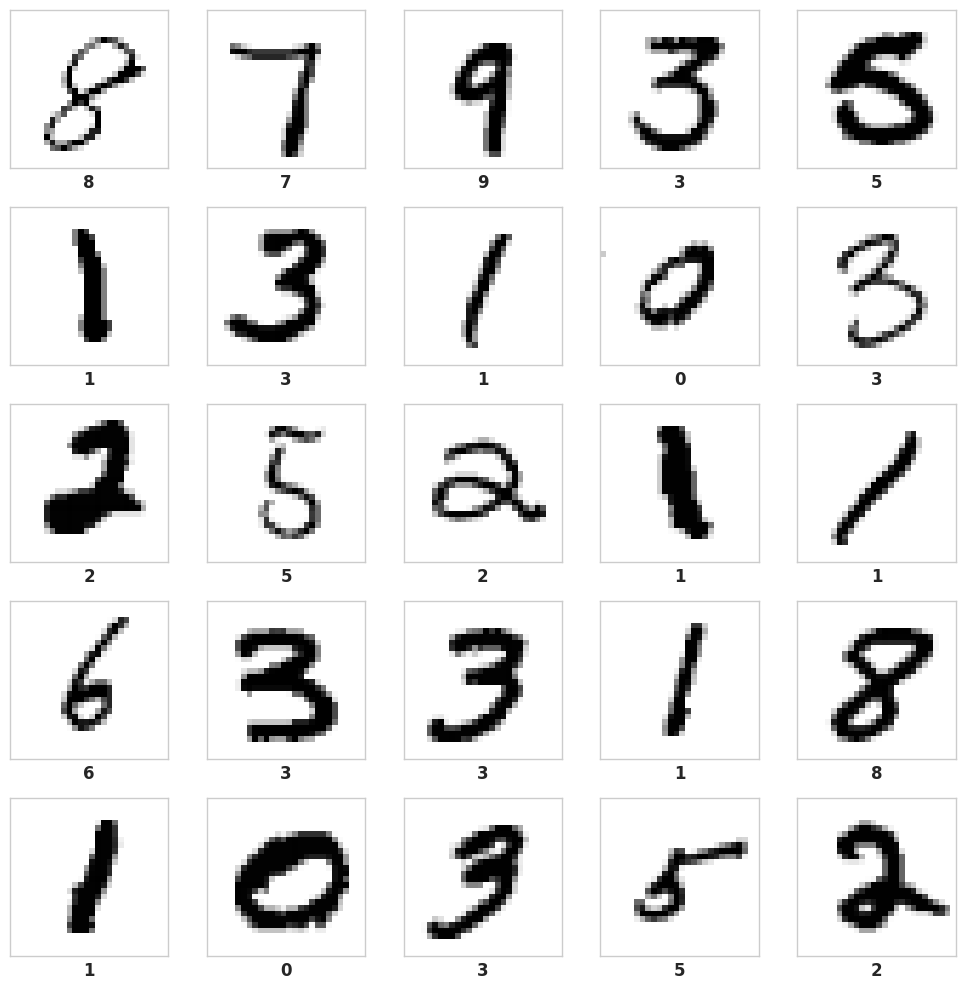

In [14]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(binaryToInt(Y_train[i]))
plt.show()

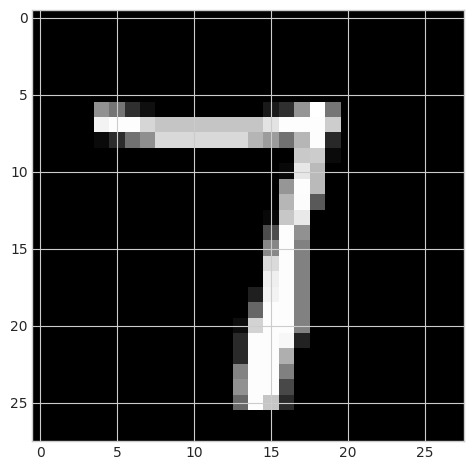

In [15]:
# Some examples
plt.imshow(X_train[1][:,:,0],cmap='gray')
plt.show()

In [16]:
#neural network --> perform convulution net (Conv2D)

model = keras.Sequential([
    layers.Conv2D(filters=8, kernel_size=5, padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    layers.MaxPool2D(pool_size=2),
    layers.Dropout(0.25),
    layers.Conv2D(filters=16, kernel_size=3, padding = 'Same',activation ='relu'),
    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation = "sigmoid"),
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

In [18]:
model.compile(
    optimizer="adam",
    loss = "categorical_crossentropy",
    metrics=['accuracy'],
)

In [19]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_valid, Y_valid),
    batch_size=256,
    epochs=30,
)

Epoch 1/30
148/148 [==============================] - 15s 89ms/step - loss: 0.7688 - accuracy: 0.7603 - val_loss: 0.2346 - val_accuracy: 0.9357
Epoch 2/30
148/148 [==============================] - 12s 84ms/step - loss: 0.2860 - accuracy: 0.9098 - val_loss: 0.1283 - val_accuracy: 0.9607
Epoch 3/30
148/148 [==============================] - 12s 82ms/step - loss: 0.2042 - accuracy: 0.9368 - val_loss: 0.0966 - val_accuracy: 0.9710
Epoch 4/30
148/148 [==============================] - 12s 84ms/step - loss: 0.1633 - accuracy: 0.9484 - val_loss: 0.0798 - val_accuracy: 0.9752
Epoch 5/30
148/148 [==============================] - 12s 79ms/step - loss: 0.1420 - accuracy: 0.9562 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 6/30
148/148 [==============================] - 12s 80ms/step - loss: 0.1245 - accuracy: 0.9613 - val_loss: 0.0608 - val_accuracy: 0.9795
Epoch 7/30
148/148 [==============================] - 12s 81ms/step - loss: 0.1119 - accuracy: 0.9648 - val_loss: 0.0587 - val_accuracy:

<Axes: >

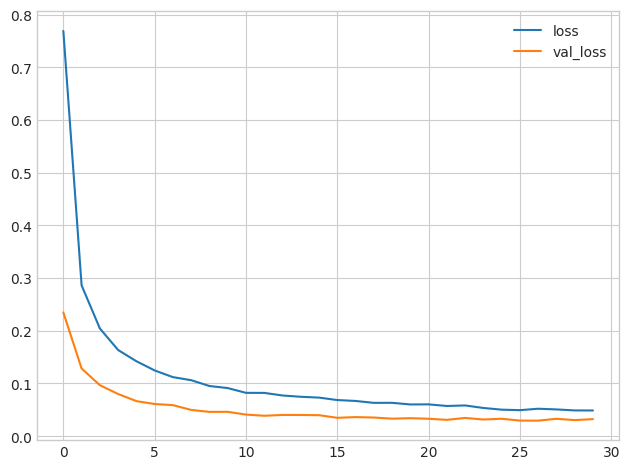

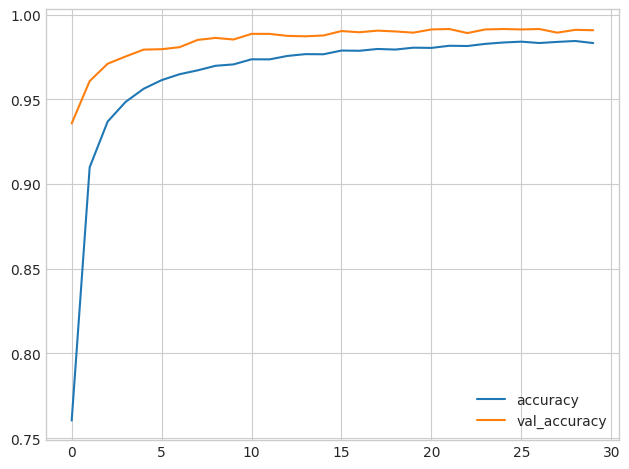

In [20]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

#plot accuracy
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

In [21]:
test_loss, test_acc = model.evaluate(X_valid, Y_valid)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

132/132 [==============================] - 1s 7ms/step - loss: 0.0322 - accuracy: 0.9907
Test Loss: 0.03217224404215813
Test Accuracy: 0.9907143115997314


In [22]:
import numpy as np

test_data= pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_data= test_data.astype('float32')/255
test_data_arr= test_data.to_numpy()
test_data_reshaped= test_data_arr.reshape((-1,28,28,1))
predictions= model.predict(test_data_reshaped)

predicted_classes= np.argmax(predictions, axis=1)

875/875 [==============================] - 6s 6ms/step


In [23]:
results= pd.Series(predicted_classes, name="Label")
submission= pd.concat([pd.Series(range(1,28001), name="ImageId"), results], axis=1)
submission.to_csv("submission.csv", index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
